# Import des librairies

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve,accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Lecture de la donnée

In [51]:
file_path = "student.csv"
data = pd.read_csv(file_path)
data_plt = pd.read_csv(file_path)

data.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [40]:
data.drop('Unnamed: 0',axis=1)
data_plt.drop('Unnamed: 0',axis=1)

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
136,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
137,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
138,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


# Traitement de la donnée

In [41]:
data['Scholarship'].replace('None', 0, inplace=True)

data.replace({'Yes': True, 'No': False}, inplace=True)

data = data.drop(data.columns[0], axis=1)

data = data.drop(9, axis=0)

data = data.dropna()

data = pd.get_dummies(data, columns=['Scholarship','High_School_Type', 'Transportation', 'Attendance'])

t={'Male':1,'Female':0}
data['Sex']=data['Sex'].replace(t)


In [42]:
print(data.describe())

print(data.isnull().sum())

                Id  Student_Age         Sex  Weekly_Study_Hours
count   138.000000   138.000000  138.000000          138.000000
mean   5075.333333    19.739130    0.608696            2.275362
std      41.249877     2.012024    0.489820            4.172850
min    5001.000000    18.000000    0.000000            0.000000
25%    5041.250000    18.000000    0.000000            0.000000
50%    5075.500000    19.000000    1.000000            0.000000
75%    5110.750000    21.000000    1.000000            2.000000
max    5145.000000    26.000000    1.000000           12.000000
Id                          0
Student_Age                 0
Sex                         0
Additional_Work             0
Sports_activity             0
Weekly_Study_Hours          0
Reading                     0
Notes                       0
Listening_in_Class          0
Project_work                0
Grade                       0
Scholarship_100%            0
Scholarship_25%             0
Scholarship_50%             0
Scho

On supprime une mauvaise valeur

In [43]:
data= data.drop(columns = 'Attendance_3')

# Graphique

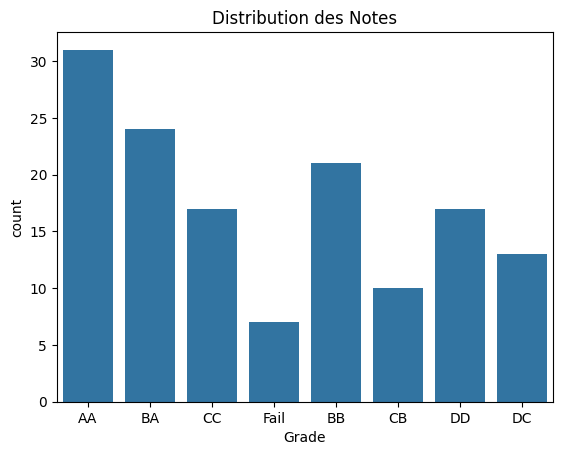

In [44]:
sns.countplot(x='Grade', data=data_plt)
plt.title('Distribution des Notes')
plt.show()


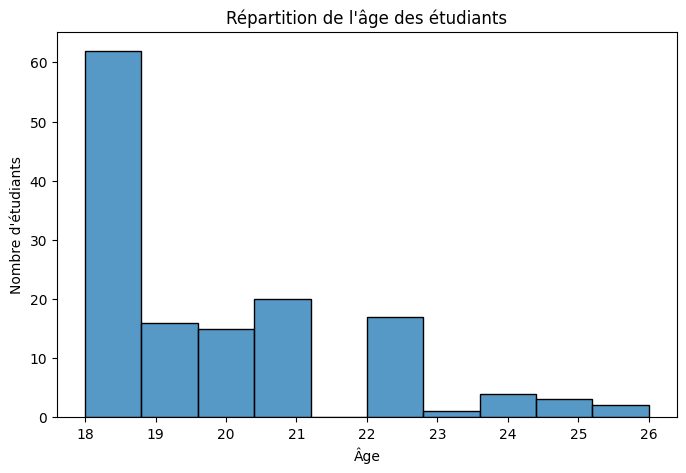

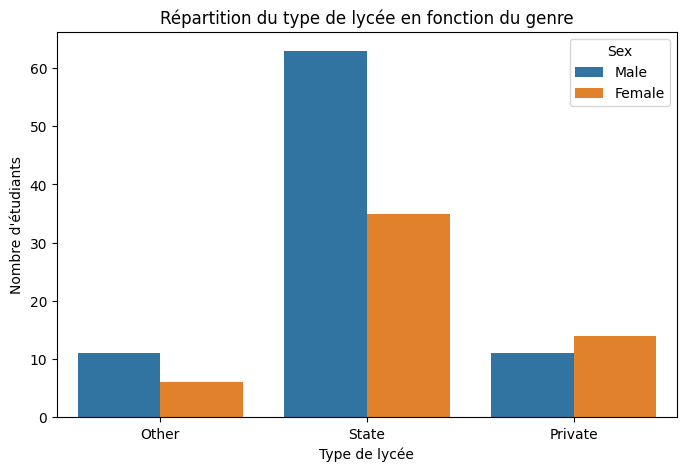

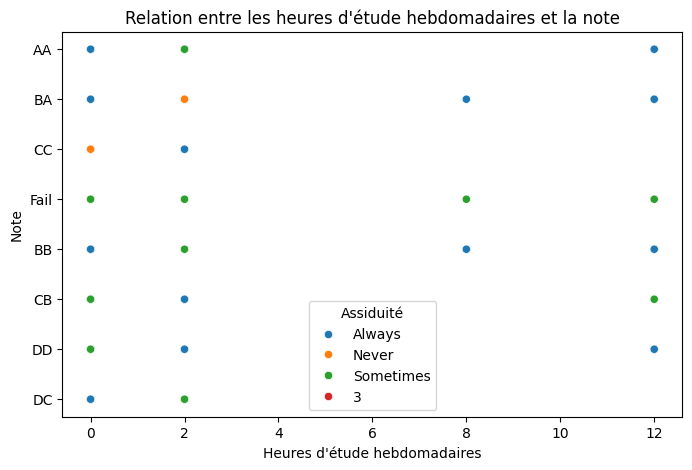

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data_plt, x='Student_Age', bins=10) #kde=True
plt.title('Répartition de l\'âge des étudiants')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'étudiants')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=data_plt, x='High_School_Type', hue='Sex')
plt.title('Répartition du type de lycée en fonction du genre')
plt.xlabel('Type de lycée')
plt.ylabel('Nombre d\'étudiants')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_plt, x='Weekly_Study_Hours', y='Grade', hue='Attendance')
plt.title('Relation entre les heures d\'étude hebdomadaires et la note')
plt.xlabel('Heures d\'étude hebdomadaires')
plt.ylabel('Note')
plt.legend(title='Assiduité')
plt.show()

In [46]:
data = data.drop(['Id'], axis=1)

# Logistic Regression

In [47]:
X = data.drop('Grade', axis=1)
Y = data['Grade']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

### GridSearchCV

In [48]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    #'penalty': ['l1', 'l2']
}

model = LogisticRegression(max_iter = 10000)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleure précision sur l'ensemble d'entraînement:", grid_search.best_score_)

test_accuracy = grid_search.score(X_test, Y_test)
print("Précision sur l'ensemble de test:", test_accuracy)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Meilleurs paramètres: {'C': 0.1}
Meilleure précision sur l'ensemble d'entraînement: 0.28901098901098904
Précision sur l'ensemble de test: 0.13043478260869565


### Meilleure modèle

In [49]:
best_model = model = LogisticRegression(C=0.001,max_iter = 10000)

best_model.fit(X_train, Y_train)

Y_pred = best_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Rapport de classification :\n{classification_rep}")


Précision du modèle : 0.18840579710144928
Rapport de classification :
              precision    recall  f1-score   support

          AA       0.19      1.00      0.32        13
          BA       0.00      0.00      0.00         9
          BB       0.00      0.00      0.00        12
          CB       0.00      0.00      0.00         4
          CC       0.00      0.00      0.00        10
          DC       0.00      0.00      0.00         7
          DD       0.00      0.00      0.00        10
        Fail       0.00      0.00      0.00         4

    accuracy                           0.19        69
   macro avg       0.02      0.12      0.04        69
weighted avg       0.04      0.19      0.06        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GridSearch Random Forest

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

print("Meilleurs hyperparamètres:", grid_search.best_params_)

y_pred_grid = grid_search.best_estimator_.predict(X_test)

accuracy_grid = accuracy_score(Y_test, y_pred_grid)
report_grid = classification_report(Y_test, y_pred_grid)

print("\nPerformance avec les meilleurs hyperparamètres:")
print("Accuracy:", accuracy_grid)
print("Classification Report:\n", report_grid)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

# Meilleur modèle RandomForest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= None, min_samples_leaf= 2, min_samples_split= 5)

rf_model.fit(X_train, Y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


# GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train, Y_train)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(Y_test, y_pred_gb)
report_gb = classification_report(Y_test, y_pred_gb)

print("Accuracy:", accuracy_gb)
print("Classification Report:\n", report_gb)


# SVM

In [ ]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))

svm_model.fit(X_train, Y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(Y_test, y_pred_svm)
report_svm = classification_report(Y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)


# CrossValidation

In [ ]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lr_model = LogisticRegression(random_state=42)

svm_scores = cross_val_score(svm_model, X, Y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_model, X, Y, cv=5, scoring='accuracy')
gb_scores = cross_val_score(gb_model, X, Y, cv=5, scoring='accuracy')
lr_scores = cross_val_score(lr_model, X, Y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:")
print("SVM Mean Accuracy:", svm_scores.mean())
print("RandomForest Mean Accuracy:", rf_scores.mean())
print("GradientBoostingClassifier Mean Accuracy:", gb_scores.mean())
print("Logistic Regression Mean Accuracy:", lr_scores.mean())
